Activity 2.1
We have seen the regression models for KNN and SVM. Complete the following tasks:

Using a sensible metric, and model validation techniques, compare the performance of a kNN and Decision Tree model as above on the noisy sine wave dataset.

Then, using a support vector regression model, create a new regression model for the above data.
Consider using different kernels for the model above. You should be able to get a very nice model this way!

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVR
from sklearn.metrics import r2_score

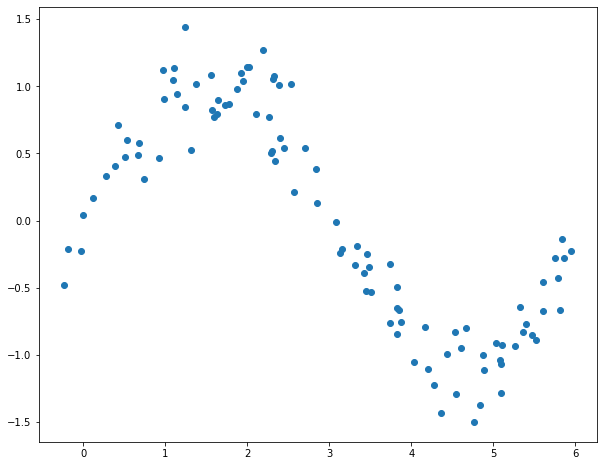

In [36]:
# Let's create a noisy sine wave.
x = np.linspace(0, 6, 101) + np.random.randn(101) / 5
y = np.sin(x) + np.random.randn(101) / 5

fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(x, y)

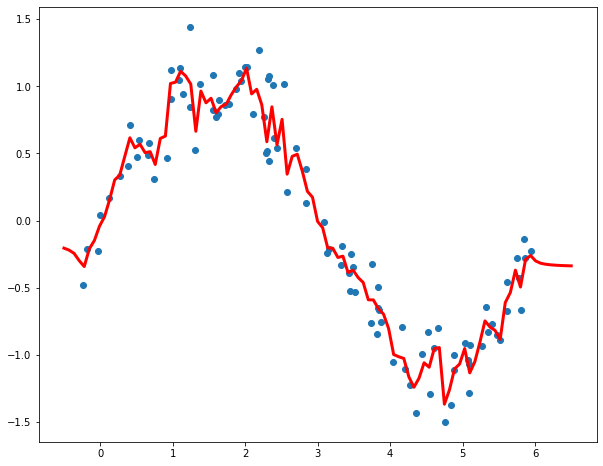

-2.8384990049062013


In [37]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5, weights='distance')

# sklearn will shout at us unless we do the following line. The error is VERY VERY 
# common - so learn how to deal with it!
#You have to reshape the data for this to work
x_reshaped = x.reshape(-1, 1)
knn.fit(x_reshaped, y)

# Let's predict outside the initial range a bit to see how extrapolation works
x_predict = np.linspace(-0.5, 6.5, 101)
x_predict_reshaped = x_predict.reshape(-1, 1)
y_predict = knn.predict(x_predict_reshaped)

fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(x, y)
ax.plot(x_predict, y_predict, c='red', lw=3)

plt.show()

r2_score(x_predict, y_predict)
print(r2_score(x_predict, y_predict,multioutput='variance_weighted'))

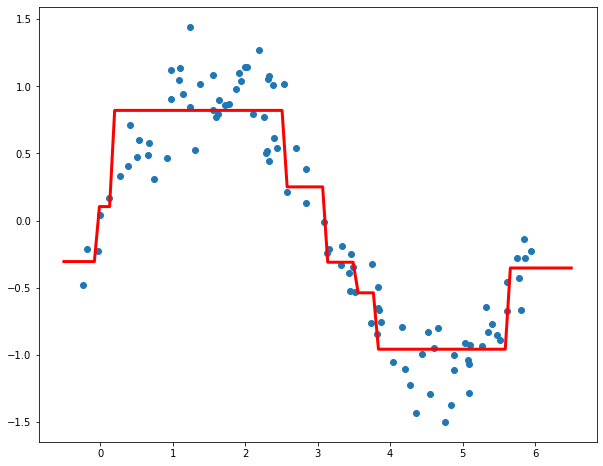

-2.830264096482484


In [38]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dt = DecisionTreeRegressor(max_depth=3)
dt.fit(x_reshaped, y)

x_predict = np.linspace(-0.5, 6.5, 101)
x_predict_reshaped = x_predict.reshape(-1, 1)
y_predict2 = dt.predict(x_predict_reshaped)

fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(x, y)
ax.plot(x_predict, y_predict2, c='red', lw=3)

plt.show()

r2_score(x_predict, y_predict2)
print(r2_score(x_predict, y_predict2,multioutput='variance_weighted'))
       

In [39]:
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

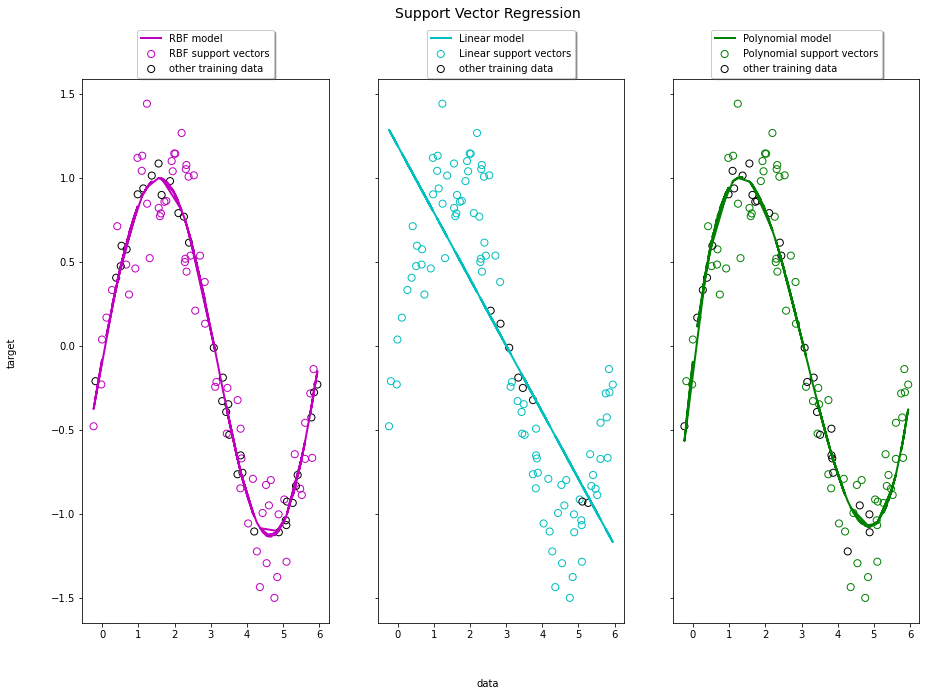

In [40]:


# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
   
    
    axes[ix].plot(x, svr.fit(x.reshape(-1,1), y).predict(x.reshape(-1,1)), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    
    axes[ix].scatter(x[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    
    axes[ix].scatter(x[np.setdiff1d(np.arange(len(x)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(x)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [41]:
y_svr_predict = svr.fit(x.reshape(-1,1), y).predict(x.reshape(-1,1))

In [42]:
r2_score(x_predict,y_svr_predict )
print(r2_score(x_predict, y_svr_predict,multioutput='variance_weighted'))

-2.952446797382068


In [44]:
r2_score(x[svr.support_],y[svr.support_])
print(r2_score(x_predict, y_svr_predict,multioutput='variance_weighted'))

-2.952446797382068


In [45]:
r2_score(x[np.setdiff1d(np.arange(len(x)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(x)), svr.support_)])
print(r2_score(x_predict, y_svr_predict,multioutput='variance_weighted'))

-2.952446797382068


In [ ]:
So we can conclude we have a better model